<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Préparation" data-toc-modified-id="Préparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Préparation</a></span><ul class="toc-item"><li><span><a href="#Méthodes-testées" data-toc-modified-id="Méthodes-testées-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Méthodes testées</a></span></li><li><span><a href="#Librairies-utilisées" data-toc-modified-id="Librairies-utilisées-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Librairies utilisées</a></span></li><li><span><a href="#Import-des-données" data-toc-modified-id="Import-des-données-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Import des données</a></span></li><li><span><a href="#Fonctions-particulières" data-toc-modified-id="Fonctions-particulières-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Fonctions particulières</a></span></li></ul></li><li><span><a href="#Exécution" data-toc-modified-id="Exécution-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exécution</a></span><ul class="toc-item"><li><span><a href="#Stratégie-avec-ajout-des-absents" data-toc-modified-id="Stratégie-avec-ajout-des-absents-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Stratégie avec ajout des absents</a></span></li><li><span><a href="#Stratégie-avec-suppression-des-absents" data-toc-modified-id="Stratégie-avec-suppression-des-absents-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Stratégie avec suppression des absents</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Préparation
## Méthodes testées
Nous avons un an et demi de données ininterrompues et régulières, de mars 2017 à août 2018.  
Nous avons fait la segmentation sur un an, en partant du principe qu'un client pouvait faire appel à Olist pour un évènement annuel particulier. Cela nous laisse 6 mois de données pour étudier la stabilité temporelle.  
Nous analyserons la stabilité temporelle de cette façon :  
  
  
**Méthode n°1 - join="outer"**
1. appliquer le StandardScaler sur l'ensemble des données
2. appliquer les 3 clusterisations sur la période P0 mars 2017 à février 2018
    1. générer le DataSet de la période P0
    2. cls = fit(data de la période P0)
    3. labels0 = cls.predict(data de la période P0)
3. appliquer les 3 clusterisations à chaque période test Pi, avec Pi = P(i-1) + 7 jours
    1. générer le Dataset de la période Pi
    2. labelsi = cls.predict(data de la période Pi)
4. Pour chaque période, ajout des individus absents de la période mais présents dans une autre période, ajout dans un nouveau cluster, ceci afin de pouvoir calculer les ARI avec tous les individus.
5. Tracer ARI(labels0,labelsi) en fonction de Pi) pour les 3 clusterisations
6. Déduire le nombre de semaines acceptable avant maintenance pour la Pi des 3 clusterisations qui atteint en premier ARI = 0.8  

Les périodes de maintenance sont très courtes, à peine deux semaines. Nous pénalisons le score ARI en maintenant dans les clusters les individus absents de l'autre période. Nous allons revoir le score en ne tenant pas compte de ces individus, simplement pour se rendre compte de l'impact des entrées/sorties des individus :  
  
  
**Méthode n°2 - join="inner"**
1. appliquer le StandardScaler sur l'ensemble des données
2. appliquer les 3 clusterisations sur la période P0 mars 2017 à février 2018
    1. générer le DataSet de la période P0
    2. cls = fit(data de la période P0)
    3. labels0 = cls.predict(data de la période P0)
3. appliquer les 3 clusterisations à chaque période test Pi, avec Pi = P(i-1) + 7 jours
    1. générer le Dataset de la période Pi
    2. labelsi = cls.predict(data de la période Pi)
4. Calcul de l'ARI avec tous les individus communs aux deux périodes.
5. Tracer ARI(labels0,labelsi) en fonction de Pi) pour les 3 clusterisations
6. Déduire le nombre de semaines acceptable avant maintenance pour la Pi des 3 clusterisations qui atteint en premier ARI = 0.8
  
  
**Pré-requis**  
  
Il va falloir retravailler les données de base (travail réalisé dans le NoteBook P5_exploratoire) pour chaque période avant le regroupement par customer_unique_id. Pour cela, on va importer le DataFrame intermédiaire du Notebook P5_exploratoire, et pour chaque période, supprimer les dates hors période étudiée et faire le regroupement pour chaque client unique dans une fonction de ce NoteBook.  
Ainsi, un client sur P0 qui vient de faire une première commande sera un nouveau client, et s'il refait une commande sur P2 il deviendra un client régulier.  


## Librairies utilisées

In [1]:
# builtin
import datetime
import sys
from datetime import date
from datetime import datetime
from datetime import timedelta
import math

# data
import numpy as np
import pandas as pd

# visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
#import seaborn as sns
#import missingno as msno

# metrics
#import scipy.stats
#from yellowbrick.cluster import KElbowVisualizer
#from yellowbrick.cluster import SilhouetteVisualizer

# preprocessing
from sklearn.metrics import adjusted_rand_score
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import cluster
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
# outils
#from tools import *

print('Matplotlib Version: ' + mpl.__version__)
print('NumPy Version: ' + np.version.full_version)
print('Python Version: ' + sys.version)
print('Pandas Version: ' + pd.__version__)
#print('Scipy Version: '+ scipy.__version__)
#print('Seaborn version: ' + sns.__version__)
#print('Missingno version: ' + msno.__version__)
# sklearn.show_versions()

now = datetime.now().isoformat()
print('Lancé le ' + now)

Matplotlib Version: 3.5.2
NumPy Version: 1.21.5
Python Version: 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
Pandas Version: 1.4.4
Lancé le 2022-11-30T16:13:53.170533


## Import des données

In [2]:
order = pd.read_csv('data/inter/df_maintenance.csv')
order['order_approved_at'] = pd.to_datetime(order['order_approved_at'])
order['order_delivery_time'] = pd.to_timedelta(order['order_delivery_time'])

In [3]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98390 entries, 0 to 98389
Data columns (total 86 columns):
 #   Column                                           Non-Null Count  Dtype          
---  ------                                           --------------  -----          
 0   Unnamed: 0                                       98390 non-null  int64          
 1   order_id                                         98390 non-null  object         
 2   customer_id                                      98390 non-null  object         
 3   order_status                                     98390 non-null  object         
 4   order_purchase_timestamp                         98390 non-null  object         
 5   order_approved_at                                98376 non-null  datetime64[ns] 
 6   order_delivered_carrier_date                     97384 non-null  object         
 7   order_delivered_customer_date                    96210 non-null  object         
 8   order_estimated_delivery_d

## Fonctions particulières

In [4]:
# fonction pour recréer le dataset final selon les dates définies

def select_data(first_date, last_date):
    '''
    Prépare les DataFrame pour la segmentation sur la période demandée
    --- Entrées ---
    first_date : Date de début de péiode, format datetime(année, mois, jour)
    last_date : Date de fin de péiode, format datetime(année, mois, jour)
    --- Sorties ---
    rfm : dataframe RFM pour clustering avec en index customer_unique_id
    happy : dataframe happy pour clustering avec en index customer_unique_id
    achat : dataframe achat pour clustering avec en index customer_unique_id
    '''

    # création des DataFrame sur la période sélectionnée
    mask = order[(order['order_approved_at'] > last_date) | (
        order['order_approved_at'] < first_date)].index
    df = order.drop(mask, axis=0)
    df = df.groupby("customer_unique_id").agg({'order_id': 'count',
                                               'order_approved_at': 'max',
                                               'price_total_mean': 'mean',
                                               'order_unavailable': 'sum',
                                               'order_canceled': 'sum',
                                               'delivery_delay_last': 'last',
                                               'delivery_delay_mean': 'mean',
                                               'order_delivery_time': 'mean',
                                               'review_score_mean': 'mean',
                                               'order_delivery_time': 'mean',
                                               'review_message_lenght': 'mean',
                                               'distance_customer_seller': 'mean',
                                               'product_weight_g_sum': 'max',
                                               'product_length_cm_max': 'max',
                                               'price_total_sum': 'sum',
                                               'freight_value_sum': 'sum',
                                               'item_count': 'sum',
                                               'price_mean': 'mean'})
    df['recence_date'] = last_date - \
        df['order_approved_at']
    df['recence'] = (
        last_date-df["order_approved_at"].min()).total_seconds()
    df['delivery_time'] = 0
    df['delivery_delay'] = order['delivery_delay_last'] + \
        order['delivery_delay_mean']
    for i in range(0, df.shape[0], 1):
        df.iloc[i, df.columns.get_loc(
            'delivery_time')] = df.iloc[i, df.columns.get_loc('order_delivery_time')].total_seconds()/3600/24
        df.iloc[i, df.columns.get_loc(
            'recence')] = df.iloc[i, df.columns.get_loc('recence_date')].total_seconds()/3600/24
    # pour que les plus grandes valeurs soient les plus récentes
    df['recence'] = -df['recence']
    # pour que les valeurs soient positives
    df['recence'] = df['recence']-min(df['recence'])
    df.drop(columns='order_delivery_time', inplace=True)
    df.drop(columns='delivery_delay_last', inplace=True)
    df.drop(columns='delivery_delay_mean', inplace=True)
    df.drop(columns='recence_date', inplace=True)
    df.rename(columns={'order_id': 'frequence'}, inplace=True)
    df.rename(
        columns={'product_weight_g_sum': 'product_weight_g_total_max'}, inplace=True)
    df.dropna(axis=0, subset='order_approved_at', inplace=True)
    df.fillna({'product_length_cm_max': df['product_length_cm_max'].median(),
               'review_score_mean': df['review_score_mean'].median(),
               'review_message_lenght': 0,
               'distance_customer_seller': df['distance_customer_seller'].median(),
               'delivery_time': df['delivery_time'].median(),
               'delivery_delay': 0}, inplace=True)
    # suppression des valeurs extrêmes
    mask = df[df['price_total_sum'] > 10000].index
    df.drop(mask, axis=0, inplace=True)
    mask = df[df['freight_value_sum'] > 1500].index
    df.drop(mask, axis=0, inplace=True)
    mask = df[df['frequence'] > 15].index
    df.drop(mask, axis=0, inplace=True)

    rfm = df[['recence', 'frequence', 'price_total_mean']]

    df['canceled'] = df['order_unavailable']+df['order_canceled']
    happy = df[[
        'delivery_delay', 'review_score_mean', 'delivery_time',
        'review_message_lenght', 'canceled']]

    achat = df[[
        'distance_customer_seller', 'product_weight_g_total_max',
        'product_length_cm_max',
        'item_count', 'price_mean']]

    return rfm, happy, achat

In [5]:
# fonction pour la prédiction des labels

def calcul_ARI_inner(rfm, happy, achat, pas_periode):
    '''
    Pour la prédiction des labels entre les DataFrame de départ 
    et ceux décalés dans le temps, en ne gardant que les individus communs
    aux deux périodes comparées P0 et Pi à chaque étape.
    --- Entrées ---
    rfm, happy, achat : les dataframes ci-nommés sur l'année de référence
    pas_periode : nombre de jours du décalage de période
    --- Sorties ---
    Dataframe avec les ARI calculés pour les 3 DataFrames
    '''
    # initialisation des variables
    k_rfm = 4
    k_happy = 4
    k_achat = 5
    periode = 1
    fti = datetime(2017, 3, 1)
    lti = datetime(2018, 2, 28)
    pas = timedelta(pas_periode)
    j = 0

    # création du Dataframe ARI
    ARI = pd.DataFrame(columns=['lti', 'ari_rfm', 'ari_happy', 'ari_achat',
                                'sil_rfm', 'sil_happy', 'sil_achat'])

    # Standardisation période 0
    ss_rfm = preprocessing.StandardScaler().fit(rfm)
    ss_happy = preprocessing.StandardScaler().fit(happy)
    ss_achat = preprocessing.StandardScaler().fit(achat)
    rfm_scaled = ss_rfm.transform(rfm)
    happy_scaled = ss_happy.transform(happy)
    achat_scaled = ss_achat.transform(achat)

    # entrainement du k-means sur la période T0
    cls_rfm = cluster.KMeans(n_clusters=k_rfm, n_init=8, random_state=42)
    cls_rfm.fit(rfm_scaled)
    cls_happy = cluster.KMeans(n_clusters=k_happy, n_init=8, random_state=42)
    cls_happy.fit(happy_scaled)
    cls_achat = cluster.KMeans(n_clusters=k_achat, n_init=8, random_state=42)
    cls_achat.fit(achat_scaled)

    # Labellisation période T0    
    labels_rfm = rfm.copy()
    labels_achat = achat.copy()
    labels_happy = happy.copy()
    labels_rfm['P0'] = cls_rfm.labels_
    labels_achat['P0'] = cls_achat.labels_
    labels_happy['P0'] = cls_happy.labels_

    while lti <= datetime(2018, 8, 31):
        # Standardisation période i avec scaler de T0
        rfm_i, happy_i, achat_i = select_data(fti, lti)
        rfm_i_scaled = ss_rfm.transform(rfm_i)
        happy_i_scaled = ss_happy.transform(happy_i)
        achat_i_scaled = ss_achat.transform(achat_i)

        # récupération des individus de la période i
        labels_rfm_i = rfm_i.copy()
        labels_rfm_i.drop(
            ['recence', 'frequence', 'price_total_mean'], axis=1, inplace=True)
        labels_achat_i = achat_i.copy()
        labels_achat_i.drop(['distance_customer_seller', 'product_weight_g_total_max',
                            'product_length_cm_max', 'item_count',
                            'price_mean'], axis=1, inplace=True)
        labels_happy_i = happy_i.copy()
        labels_happy_i.drop(['delivery_delay', 'review_score_mean', 'delivery_time',
                            'review_message_lenght', 'canceled'], axis=1, inplace=True)
        
        # labellisation de la période i avec algorythmes entrainés à t0
        labels_rfm_i['Pi'] = cls_rfm.predict(rfm_i_scaled)
        labels_happy_i['Pi'] = cls_happy.predict(happy_i_scaled)
        labels_achat_i['Pi'] = cls_achat.predict(achat_i_scaled)

        # rassemblement des individus des périodes 0 et i dans un DataFrame
        labels_rfm_compar = pd.concat(
            [labels_rfm, labels_rfm_i], axis=1, join="inner")
        labels_happy_compar = pd.concat(
            [labels_happy, labels_happy_i], axis=1, join="inner")
        labels_achat_compar = pd.concat(
            [labels_achat, labels_achat_i], axis=1, join="inner")

        # attribution d'un nouveau cluster aux asbents de l'une ou l'autre période
        #labels_rfm_compar.fillna(k_rfm, inplace=True)
        #labels_happy_compar.fillna(k_happy, inplace=True)
        #labels_achat_compar.fillna(k_achat, inplace=True)

        # calcul ARI
        ari_rfm = adjusted_rand_score(
            labels_rfm_compar['P0'], labels_rfm_compar['Pi'])
        ari_happy = adjusted_rand_score(
            labels_happy_compar['P0'], labels_happy_compar['Pi'])
        ari_achat = adjusted_rand_score(
            labels_achat_compar['P0'], labels_achat_compar['Pi'])
        
        # calcul silhouette_score
        sil_rfm = metrics.silhouette_score(
            rfm_i_scaled, labels_rfm_i['Pi'])
        sil_happy = metrics.silhouette_score(
            happy_i_scaled, labels_happy_i['Pi'])
        sil_achat = metrics.silhouette_score(
            achat_i_scaled, labels_achat_i['Pi'])

        ARI.loc[j] = [lti, ari_rfm, ari_happy,
                      ari_achat, sil_rfm, sil_happy, sil_achat]

        fti = fti+pas
        lti = lti+pas
        j = j+1

    return ARI, labels_rfm_compar

In [6]:
# fonction pour la prédiction des labels

def calcul_ARI(rfm, happy, achat, pas_periode):
    '''
    Pour la prédiction des labels entre les DataFrame de départ 
    et ceux décalés dans le temps, en gardant tous les individus présents 
    sur les périodes P0 et Pi à chaque étape.
    --- Entrées ---
    rfm, happy, achat : les dataframes ci-nommés sur l'année de référence
    pas_periode : nombre de jours du décalage de période
    --- Sorties ---
    Dataframe avec les ARI calculés pour les 3 DataFrames
    '''
    # initialisation des variables
    k_rfm = 4
    k_happy = 4
    k_achat = 5
    periode = 1
    fti = datetime(2017, 3, 1)
    lti = datetime(2018, 2, 28)
    pas = timedelta(pas_periode)
    j = 0

    # création du Dataframe ARI
    ARI = pd.DataFrame(columns=['lti', 'ari_rfm', 'ari_happy', 'ari_achat',
                                'sil_rfm', 'sil_happy', 'sil_achat'])

    # Standardisation période 0
    ss_rfm = preprocessing.StandardScaler().fit(rfm)
    ss_happy = preprocessing.StandardScaler().fit(happy)
    ss_achat = preprocessing.StandardScaler().fit(achat)
    rfm_scaled = ss_rfm.transform(rfm)
    happy_scaled = ss_happy.transform(happy)
    achat_scaled = ss_achat.transform(achat)

    # entrainement du k-means sur la période T0
    cls_rfm = cluster.KMeans(n_clusters=k_rfm, n_init=8, random_state=42)
    cls_rfm.fit(rfm_scaled)
    cls_happy = cluster.KMeans(n_clusters=k_happy, n_init=8, random_state=42)
    cls_happy.fit(happy_scaled)
    cls_achat = cluster.KMeans(n_clusters=k_achat, n_init=8, random_state=42)
    cls_achat.fit(achat_scaled)

    # Labellisation période T0    
    labels_rfm = rfm.copy()
    labels_achat = achat.copy()
    labels_happy = happy.copy()
    labels_rfm['P0'] = cls_rfm.labels_
    labels_achat['P0'] = cls_achat.labels_
    labels_happy['P0'] = cls_happy.labels_

    while lti <= datetime(2018, 8, 31):
        # Standardisation période i avec scaler de T0
        rfm_i, happy_i, achat_i = select_data(fti, lti)
        rfm_i_scaled = ss_rfm.transform(rfm_i)
        happy_i_scaled = ss_happy.transform(happy_i)
        achat_i_scaled = ss_achat.transform(achat_i)

        # récupération des individus de la période i
        labels_rfm_i = rfm_i.copy()
        labels_rfm_i.drop(
            ['recence', 'frequence', 'price_total_mean'], axis=1, inplace=True)
        labels_achat_i = achat_i.copy()
        labels_achat_i.drop(['distance_customer_seller', 'product_weight_g_total_max',
                            'product_length_cm_max', 'item_count',
                            'price_mean'], axis=1, inplace=True)
        labels_happy_i = happy_i.copy()
        labels_happy_i.drop(['delivery_delay', 'review_score_mean', 'delivery_time',
                            'review_message_lenght', 'canceled'], axis=1, inplace=True)
        
        # labellisation de la période i avec algorythmes entrainés à t0
        labels_rfm_i['Pi'] = cls_rfm.predict(rfm_i_scaled)
        labels_happy_i['Pi'] = cls_happy.predict(happy_i_scaled)
        labels_achat_i['Pi'] = cls_achat.predict(achat_i_scaled)

        # rassemblement des individus des périodes 0 et i dans un DataFrame
        labels_rfm_compar = pd.concat(
            [labels_rfm, labels_rfm_i], axis=1, join="outer")
        labels_happy_compar = pd.concat(
            [labels_happy, labels_happy_i], axis=1, join="outer")
        labels_achat_compar = pd.concat(
            [labels_achat, labels_achat_i], axis=1, join="outer")

        # attribution d'un nouveau cluster aux asbents de l'une ou l'autre période
        labels_rfm_compar.fillna(k_rfm, inplace=True)
        labels_happy_compar.fillna(k_happy, inplace=True)
        labels_achat_compar.fillna(k_achat, inplace=True)

        # calcul ARI
        ari_rfm = adjusted_rand_score(
            labels_rfm_compar['P0'], labels_rfm_compar['Pi'])
        ari_happy = adjusted_rand_score(
            labels_happy_compar['P0'], labels_happy_compar['Pi'])
        ari_achat = adjusted_rand_score(
            labels_achat_compar['P0'], labels_achat_compar['Pi'])
        
        # calcul silhouette_score
        sil_rfm = metrics.silhouette_score(
            rfm_i_scaled, labels_rfm_i['Pi'])
        sil_happy = metrics.silhouette_score(
            happy_i_scaled, labels_happy_i['Pi'])
        sil_achat = metrics.silhouette_score(
            achat_i_scaled, labels_achat_i['Pi'])

        ARI.loc[j] = [lti, ari_rfm, ari_happy,
                      ari_achat, sil_rfm, sil_happy, sil_achat]

        fti = fti+pas
        lti = lti+pas
        j = j+1

    return ARI, labels_rfm_compar

# Exécution
La courbe de l'ARI en fonction du temps pour la segmentation RFM remonte au bout de quelques mois...  
Nous allons voir si ce sont les ajouts des absents qui nous perturbent. Peut-être que les individus ayant passés plusieurs commandes disparaissent rapidement, puis réapparaissent en faisant monter l'ARI... Pourquoi cela ne touche que la courbe RFM...?
## Stratégie avec ajout des absents

In [7]:
first_date = datetime(2017, 3, 1)
last_date = datetime(2018, 2, 28)
rfm, happy, achat = select_data(first_date, last_date)

In [8]:
resultat, df = calcul_ARI(rfm, happy, achat, 2)

In [9]:
# préparation pour le calcul du nombre de jours avant maintenance

# on va retirer les dates après juillet pour ne pas être
# perturbé par la remontée de l'ARI pour la segmentation RFM

resultat_debut = resultat.copy()
resultat_debut = resultat_debut[resultat_debut['lti'] < datetime(2018, 7, 1)]
resultat_debut

,lti,ari_rfm,ari_happy,ari_achat,sil_rfm,sil_happy,sil_achat
0,2018-02-28,1.000000,1.000000,1.000000,0.527253,0.537605,0.423917
1,2018-03-02,0.957406,0.968730,0.971898,0.527107,0.537249,0.424010
2,2018-03-04,0.913792,0.942719,0.947771,0.527094,0.537081,0.423970
3,2018-03-06,0.878605,0.922362,0.929058,0.526735,0.536988,0.423876
4,2018-03-08,0.846233,0.895331,0.902569,0.526839,0.536339,0.423842
...,...,...,...,...,...,...,...
57,2018-06-22,0.405431,0.288582,0.329787,0.492676,0.536598,0.429758
58,2018-06-24,0.417867,0.285294,0.326038,0.491517,0.536787,0.430150
59,2018-06-26,0.429616,0.282324,0.322758,0.490796,0.537218,0.430187
60,2018-06-28,0.441279,0.277639,0.317599,0.490673,0.537663,0.430567


In [10]:
# calcul du nombre de jours nécessaires avant maintenance
# segmentation RFM
mask = max(resultat_debut[resultat_debut['ari_rfm'] < 0.8]['ari_rfm'])
a = resultat_debut[resultat_debut['ari_rfm'] == mask]['lti']
b = min(resultat_debut['lti'])
jours_rfm = int(((a-b).values)/3600/24/1000000000)

In [11]:
# calcul du nombre de jours nécessaires avant maintenance
# segmentation Happy
mask = max(resultat_debut[resultat_debut['ari_happy'] < 0.8]['ari_happy'])
a = resultat_debut[resultat_debut['ari_happy'] == mask]['lti']
b = min(resultat_debut['lti'])
jours_happy = int(((a-b).values)/3600/24/1000000000)

In [12]:
# calcul du nombre de jours nécessaires avant maintenance
# segmentation achat
mask = max(resultat_debut[resultat_debut['ari_achat'] < 0.8]['ari_achat'])
a = resultat_debut[resultat_debut['ari_achat'] == mask]['lti']
b = min(resultat_debut['lti'])
jours_achat = int(((a-b).values)/3600/24/1000000000)
jours_achat

20

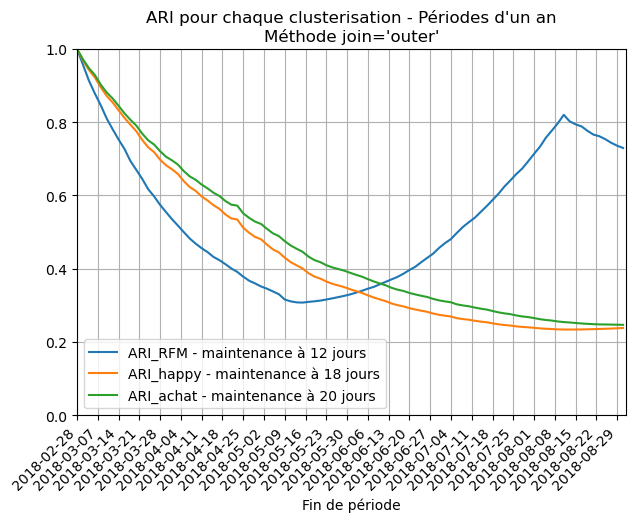

In [13]:
# affichage des courbes ARI
plt.plot(resultat['lti'], resultat['ari_rfm'], label=f'ARI_RFM - maintenance à {jours_rfm} jours')
plt.plot(resultat['lti'], resultat['ari_happy'], label=f'ARI_happy - maintenance à {jours_happy} jours')
plt.plot(resultat['lti'], resultat['ari_achat'], label=f'ARI_achat - maintenance à {jours_achat} jours')
plt.legend()
plt.xlim(datetime(2018, 2, 28), datetime(2018, 9, 1))
plt.ylim(0, 1)
plt.title("ARI pour chaque clusterisation - Périodes d'un an\nMéthode join='outer'")
plt.xlabel('Fin de période')
plt.grid()
plt.tight_layout()

plt.xticks(np.arange(datetime(2018, 2, 28), datetime(2018, 9, 1),
           timedelta(days=7)).astype(datetime), rotation=45, ha='right')

plt.show()

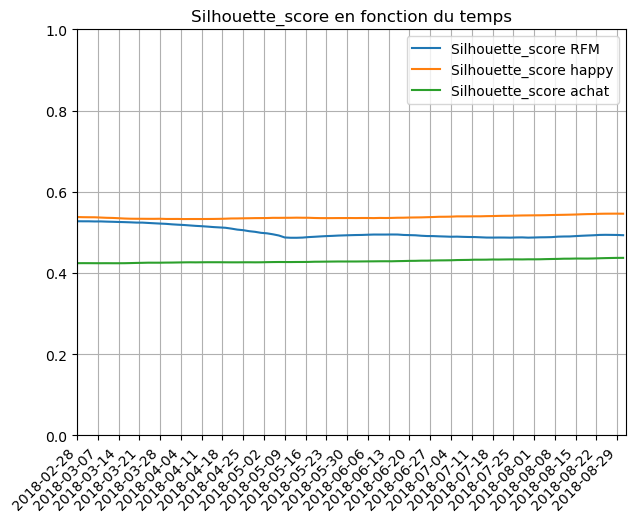

In [14]:
# affichage des courbes de silhouette_score
plt.plot(resultat['lti'], resultat['sil_rfm'], label='Silhouette_score RFM')
plt.plot(resultat['lti'], resultat['sil_happy'],
         label='Silhouette_score happy')
plt.plot(resultat['lti'], resultat['sil_achat'],
         label='Silhouette_score achat')
plt.legend()
plt.xlim(datetime(2018, 2, 28), datetime(2018, 9, 1))
plt.ylim(0, 1)
plt.title('Silhouette_score en fonction du temps')
plt.grid()
plt.tight_layout()

plt.xticks(np.arange(datetime(2018, 2, 28), datetime(2018, 9, 1),
           timedelta(days=7)).astype(datetime), rotation=45, ha='right')

plt.show()

## Stratégie avec suppression des absents

In [15]:
resultat_inner, df_inner = calcul_ARI_inner(rfm, happy, achat, 7)

In [16]:
# préparation pour le calcul du nombre de jours avant maintenance

# on va retirer les dates après juillet pour ne pas être
# perturbé par la remontée de l'ARI pour la segmentation RFM

resultat_inner_debut = resultat_inner.copy()
resultat_inner_debut = resultat_inner_debut[resultat_inner_debut['lti'] < datetime(2018, 7, 1)]
resultat_inner_debut

,lti,ari_rfm,ari_happy,ari_achat,sil_rfm,sil_happy,sil_achat
0,2018-02-28,1.000000,1.000000,1.000000,0.527253,0.537605,0.423917
1,2018-03-07,0.935721,0.999417,0.999393,0.526683,0.536620,0.423744
2,2018-03-14,0.875965,0.998713,0.998876,0.525449,0.534717,0.423802
3,2018-03-21,0.814454,0.998257,0.997897,0.523906,0.533396,0.424546
4,2018-03-28,0.749837,0.998219,0.996802,0.521506,0.533379,0.425141
5,2018-04-04,0.685762,0.997815,0.995893,0.518379,0.532611,0.425737
6,2018-04-11,0.629224,0.996980,0.995415,0.515057,0.532713,0.426162
7,2018-04-18,0.581183,0.996730,0.994340,0.511606,0.533294,0.426234
8,2018-04-25,0.518376,0.996365,0.993082,0.505248,0.534492,0.426146
9,2018-05-02,0.453277,0.995899,0.992279,0.498272,0.535213,0.426299


In [17]:
# calcul du nombre de jours nécessaires avant maintenance
# segmentation RFM

mask = max(
    resultat_inner_debut[resultat_inner_debut['ari_rfm'] < 0.8]['ari_rfm'])
a = resultat_inner_debut[resultat_inner_debut['ari_rfm'] == mask]['lti']
b = min(resultat_inner_debut['lti'])
jours_rfm = int(((a-b).values)/3600/24/1000000000)

In [18]:
# calcul du nombre de jours nécessaires avant maintenance
# segmentation Happy

jours_happy = ""  # int(((a-b).values)/3600/24/1000000000)

In [19]:
# calcul du nombre de jours nécessaires avant maintenance
# segmentation achat

jours_achat = ""  # int(((a-b).values)/3600/24/1000000000)
jours_achat

''

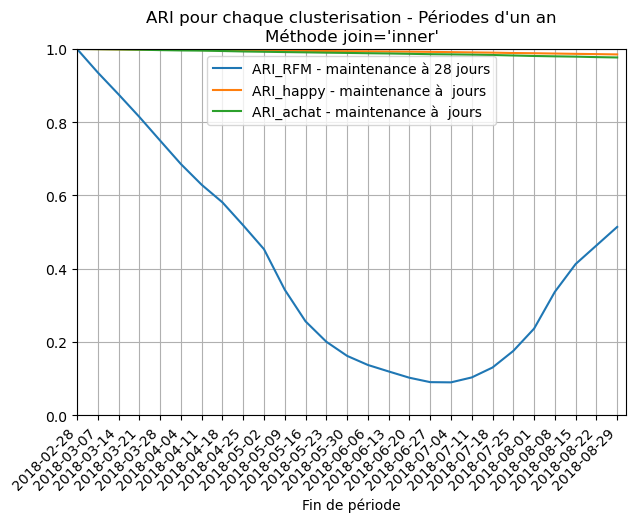

In [20]:
# affichage des courbes ARI
plt.plot(resultat_inner['lti'], resultat_inner['ari_rfm'],
         label=f'ARI_RFM - maintenance à {jours_rfm} jours')
plt.plot(resultat_inner['lti'], resultat_inner['ari_happy'],
         label=f'ARI_happy - maintenance à {jours_happy} jours')
plt.plot(resultat_inner['lti'], resultat_inner['ari_achat'],
         label=f'ARI_achat - maintenance à {jours_achat} jours')
plt.legend()
plt.xlim(datetime(2018, 2, 28), datetime(2018, 9, 1))
plt.ylim(0, 1)
plt.title("ARI pour chaque clusterisation - Périodes d'un an\nMéthode join='inner'")
plt.xlabel('Fin de période')
plt.grid()
plt.tight_layout()

plt.xticks(np.arange(datetime(2018, 2, 28), datetime(2018, 9, 1),
           timedelta(days=7)).astype(datetime), rotation=45, ha='right')

plt.show()

On a toujours cette remontée de l'ARI pour la segmentation RFM et on a en plus cette fois les deux autres segmentations qui ne bougent pas. Ce qui est logique puisque ayant très peu de clients qui ont passé plusieurs commandes, les clients voient peu de modifications dans leur appartenance à un segment. Finalement le seul critère qui va bouger pour la plupart est la récence.

# Conclusion

Au minimum il faudrait relancer la segmentation tous les 12 jours. Il s'agit d'une opération rapide, compter une heure.
Il s'agira juste de refaire tourner les K-means. Il ne sera pas nécessaire de recréer une segmentation avec de nouveaux segments. Le silhouette score nous montre que la construction des clusters (nombre, position des centres, interprétation métier) est très stable dans le temps.